# Training Models

## Introduction

- Not a black-box approach, start from **Linear Regression** Model
- Two ways to train it:
    1. Find a "closed form" equation
    2. Using Gradient Descent (GD, iternative optimization)
- Polynomial regression: more parameters, more complex, overfitting risk (can be reduced using **regularization techniques**


## Linear Regression



- Notation
    $$
    \hat{y} = h_{\theta}(x) = \theta \cdot x
    $$
    
    - $\theta$ parameter vector with bias term $\theta_0$
    - $x$ feature vector where $x_0=1$
    - $h_\theta$ hypothesis function

- Training
    - Training means setting parameters to fit the data in the best way possible
    - Reduce RMSE, but simpler to minimize the MSE in practice (trivial)


$$
MSE(X,h_\theta)=\frac{1}{m}\sum_{i=1}^m(\theta^Tx^{(i)}-y^{(i)})^2
$$

- The Normal Equation
    - This discussion is the same as that done in Oliver Sir's classes.

    $$
    \hat{\theta} = (X^TX)^{-1} X^T y
    $$

    - The estimated $\hat\theta$ minimizes the cost function


In [ ]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

In [ ]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21064087],
       [3.06911994]])

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [ ]:
lin_reg.intercept_, lin_reg.coef_

(array([4.21064087]), array([[3.06911994]]))

- Noise doesn't allow us to recover the exact parameters.
- $X^+$ is the (Moore-Penrose inverse) *pseudoinverse* of $X$
    - Uses Singular Value Decomposition (SVD)
    - $X = U \Sigma V^T$

    > “The pseudoinverse is computed as X+ = VΣ+U⊺. To compute the matrix Σ+, the algorithm takes Σ and sets to zero all values smaller than a tiny threshold value, then it replaces all the nonzero values with their inverse, and finally it transposes the resulting matrix. This approach is more efficient than computing the Normal Equation, plus it handles edge cases nicely: indeed, the Normal Equation may not work if the matrix X⊺X is not invertible (i.e., singular), such as if m < n or if some features are redundant, but the pseudoinverse is always defined.” ([Géron, p. 117](zotero://select/library/items/DKQ8XXHR)) ([pdf](zotero://open-pdf/library/items/5XPMGMEE?page=147&annotation=P7KRS9HB))

- Computational Complexity

 - Inverting the \(X^TX) matrix is costly
 - Even with SVD ($O(n^2)$), training becomes very slow as the number of features grow large (like 100k)
 - They handle large training sets efficiently (since they are linear to number of instances). Predictions are also fast.

## Gradient Descent

- Method
 - A different way to train a model.
 - Uses iterative techniques to find the local minima (check the slope at a point and move downward) of the cost function.
 - Start with *random initialization*, filling $\theta$ with random values.
 - **Size of step** matters! Too long to converge vs never converge...
 - May not reach the **Global minima**

Lucky for us, MSE cost function of LR is *convex* so always reaches global.

- *Feature scaling* in order to ensure that the convergence happens faster (Bowl shaped cost function)
- *Parameter Space*: The more \# of parameters, the more dimension of this space. The tricker it is to search for the minima (needle in a 300-dimensional haystack)

- Batch Gradient Descent

 - Compute the gradient (partial derivatives are the components that make up the gradient vector) wrt each $\theta_j$ For each of them, we should compute

 $$
 \dfrac{\partial}{\partial \theta_{j}}MSE(\theta) = \dfrac{2}{m} \sum^m_{i=1}\left(\theta^Tx^{(i)}-y^{(i)}\right)x_{j}^{(i)})
 $$

 - But we can find all of them at one go using:

 $$
 \nabla_{\theta}MSE(\theta) = \dfrac{2}{m}X^T(X\theta -y)
 $$

 - This involves calc over the entire $X$, whole of data at every step. Thus called "batch" gradient descent (terribly slow on large datasets)
 - But this scales well with number of features.

In [ ]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.21064087],
       [3.06911994]])

- Moral
    - Larger datasets (rows): Use SVD and Normal equations
    - More features (columns): Use GD - Find a balanced learning rate

- How to find the number of iterations? Set a very large number of iterations and stop when the norm of the step sizes become $\lt \epsilon$ (*tolerance*)

$$
\theta^{(\text{next step})} = \theta - \eta \nabla_{\theta}MSE(\theta)
$$

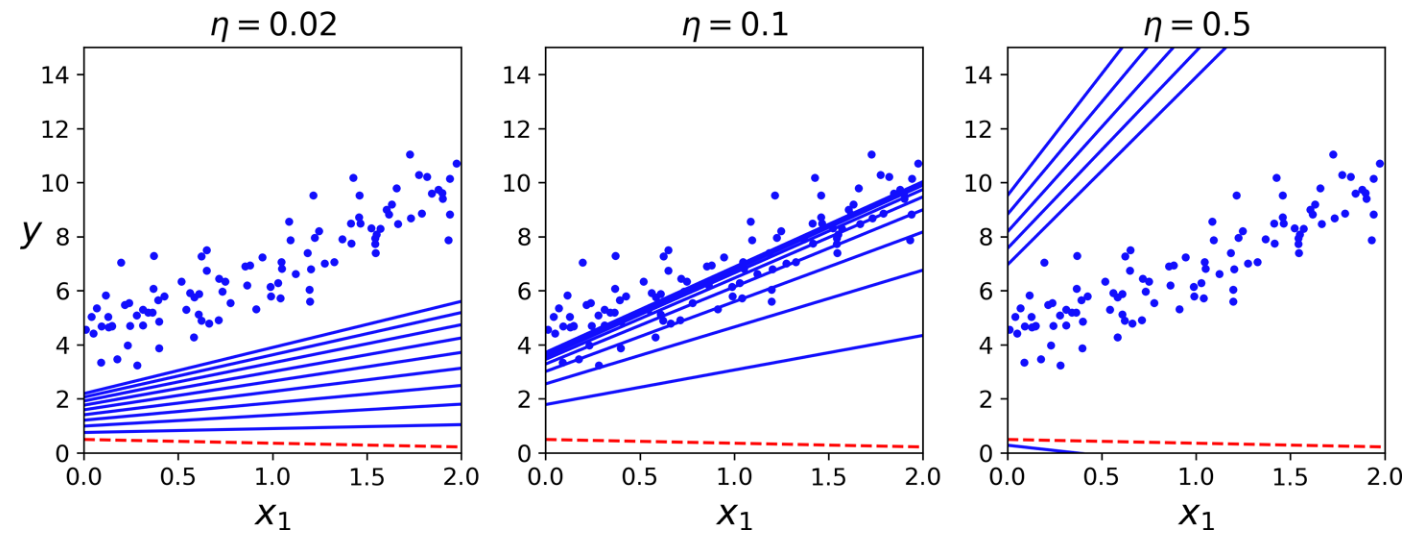

Gradient Descent with various learning rates

- Stochastic GD
 - Instead of taking the full data at each step **select at random a random instance in the training set** and compute the gradient based on that single instance only.
 - PRO: Faster than Batch GD Irregular cost function: Jump out of local minima.
    - Out-of-core implementation possible.
 - CON: less regular than Batch GD. Good but not optimal final values.

> “randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum” ([Géron, p. 125](zotero://select/library/items/DKQ8XXHR)) ([pdf](zotero://open-pdf/library/items/5XPMGMEE?page=155&annotation=UYNLVJS4))

- Simulated Annealing: (*Metallurgy*, best of both worlds)
 - Large steps first (each iteration/step called an **epoch**)
 - Smaller steps  gradually (settle at global minima)
 - Warning: reduce too quickly and you get stuck halfway. Tooo slow: you jump around and suboptimal if you hault early.


In [ ]:
# Function determining the learning rate is called LEARNING SCHEDULE

n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/ (t + t1)

theta = np.random.randn(2,1) #random init

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

print(theta)

[[4.20312221]
 [3.12878723]]


You will notice that the line moves very fast towards the require regression line and when it is closer to it, it does slight adjustments. Like wearing clothes, first you put the clothes on very fast then you adjust and ensure that it looks good on you.

For using SGD, training instances must be **iid**. To ensure that, shuffle instances during training (say before each epoch).

- Why? If not random (say sorted by label), SGD will optimize for sort by label. BAD

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty= None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [ ]:
# Note values will be different every time due to the randomness
sgd_reg.intercept_, sgd_reg.coef_

(array([4.17488765]), array([3.05366614]))

- Batch GD: Full dataset. (Focused but very slow)
- Stochastic GD: One instance. (Fast but erratic)
- **Mini-batch Gradient Descent: Random set of instances** called *mini-batches* (Faster and less erratic)
 - $>$ SGD: Performance boost from hardware optimizations of matrix operations (GPUs)
 - $<$ SGD: Harder to escape local minima.
 - Need a good learning schedule.

| Algorithm       | Large m | Out-of-core support | Large n | Hyperparams | Scaling Required? | Scikit-Learn       |
| --------------- | ------- | ------------------- | ------- | ----------- | ----------------- | ------------------ |
| Normal Equation | Fast    | No                  | Slow    | 0           | No                | N/A                |
| SVD             | Fast    | No                  | Slow    | 0           | No                | `LinearRegression` |
| Batch GD        | Slow    | No                  | Fast    | 2           | Yes               | `SGDRegressor`     |
| Stochastic GD   | Fast    | Yes                 | Fast    | $\geq 2$    | Yes               | `SGDRegressor`     |
| Mini-batch GD   | Fast    | Yes                 | Fast    | $\geq 2$    | Yes               | `SGDRegressor`     |


## Polynomial Regression

More than a straight line? Add powers of each feature $X^p$.

In [ ]:
import numpy as np

m = 100
X = 6 * np.random.rand(m,1) -3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

X[0]

array([-0.00268531])

- Adds all combinations of features upto a given degree. So, if $a$ and $b$ are two distinct features, and we provide $\text{degree}=3$. Then $ab$, $a^2b$ and $ab^2$ to our featurre list along with $a^3$ and $b^3$.

In [ ]:
X_poly[0]

array([-2.68531292e-03,  7.21090549e-06])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [ ]:
from IPython.display import Markdown
display(Markdown(f"${lin_reg.coef_[0][1]:.2f}X^2 + {lin_reg.coef_[0][0]:.2f}X + {lin_reg.intercept_[0]:.2f}$"))

$0.50X^2 + 0.98X + 1.91$

X_new:
 [[-3.        ]
 [-2.93939394]
 [-2.87878788]
 [-2.81818182]
 [-2.75757576]]


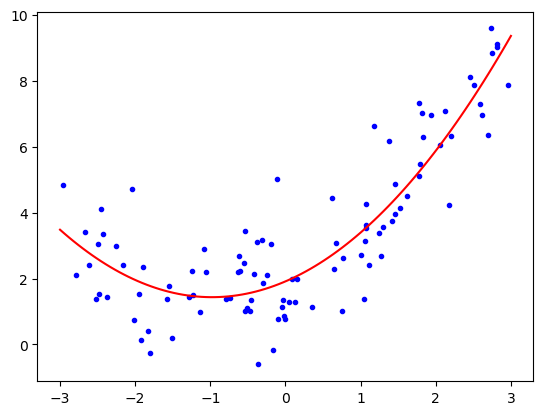

In [ ]:
import matplotlib.pyplot as plt

X_new = np.linspace(-3,3, 100).reshape(100,1); print("X_new:\n",X_new[0:5])
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X,y, 'b.')
plt.plot(X_new, y_new, "r-")

plt.show()

## Learning Curves

- Higher the degree, more severe is the overfitting.
- And vise-versa (`Linear` model underfits)
- How to determine complexity? Cross-validation (Ch2)?
 - Training: Good. CV: Bad => Overfitting
 - Training: Bad. CV: Bad => Underfitting

- Another way: Learning Curves:
 - plot model's performance on training and validation set as $f(\text{Training Iteration})$  or $f(\text{Training Iteration})$



In [ ]:
## Implementation
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator

def plot_learning_curves(model: BaseEstimator, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val , y_val_predict))

    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.legend(loc="upper right", fontsize=10)   # not shown in the book

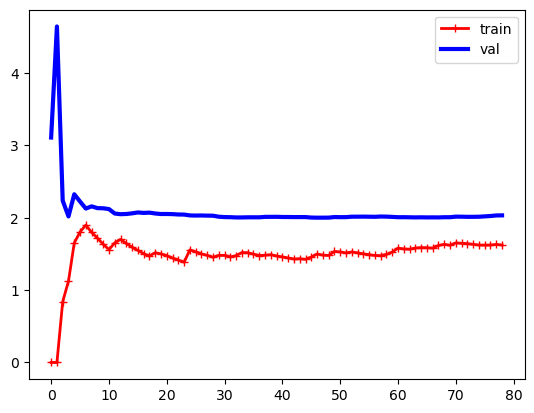

In [ ]:
# Simple Linear Regression
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

- Red Curve (Training) starts at zero for few data points, easiest to fit. Becomes more difficult to fit all of them as the number increases due to noise. Average error plateus out.

- Blue Curve (Validation) initially incapable of *generalizing* due to small data. Straight line incapable of modelling data well (ends up plateuing)

- Conclusion: Underfitting: Both reached a plateu: pretty close and fairly high

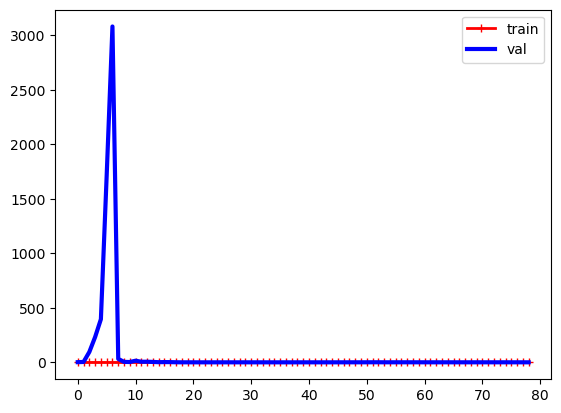

In [ ]:
# 10th-degree polynomial model on the same data
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

- Error in training data is much lower
- Gap between the curves: Model performs significantly better on training: hallmark of overfitting.

**Bias/Variance Tradeoff: Reason for Model's generalization error**

- Bias: Wrong assumption. Linear model when really data is quadratic
- Variance: Excessive sensitivity to small variations in training data. Fit noise (high df)
- Irreducible error: Inherent noise. Reduced by cleaning up data or fix data sources (measurement devices).


Why the tradeoff?
- More complex model => more variance and less bias.
- Lower complexity => more bias but less variance (sensitivity)

## Regularized Linear Models

- Regularize (to constrain) to reduce overfitting (less d.f.)
- Constrain weights of the model

### Ridge

- Regularization term: $\alpha \sum_{i=1}^n \theta_{i}^2$

- Force model weights to be as small as possible
- Use only during training. While performance evaluation use *unregularized performance measure*
- $\alpha=0$ is Linear Regression ($y=mx+c$).
- $\alpha\to\infty$ is just a flat line through mean (no slope, $y=c$).

$$
J(\theta) = MSE(\theta) + \alpha\dfrac{1}{2}\sum_{i=1}^n \theta_{i}^2
$$

- Bias term, $\theta_0$ is not regularized
- $w = (\theta_1, \theta_2, \dots \theta_n)$
- $\frac{1}{2}(\lVert w \rVert_2)^2$ = $\ell_{2}$ norm of weight vector. So $J(\theta) = MSE(\theta) + \alpha w$


In [ ]:
# Linear Regression
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.75415032]])

In [ ]:
#  SGD
sgd_reg = SGDRegressor(penalty='l2') # l2 penalty for Ridge (circular)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.72814838])

### Lasso

- LASSO: Least Absolute Shrinkage & Selection Operator
- $\ell_1$ norm of the weight vector
- Regularization term: $\alpha \sum_{i=1}^n \lvert\theta_{i}\rvert$

- tends to eliminate weights of least important features: performs feature selection for us. Outputs a *Sparse* model.
- Very sensitive $\alpha$ values. $\alpha=1E{-07}$ looks quadratic. $\alpha=1$ is flat.



In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.70542799])

In [ ]:
sgd_reg = SGDRegressor(penalty='l1')
# sgd_reg.fit(X,y) #sgd expects a 1d-vector
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.72921324])

### Elastic Net

- Middle ground: Ridge & LASSO
- mix ratio: $r$ from 0 (Ridge) to 1 (LASSO)

$$
J(\theta) = MSE(\theta) + r\alpha\sum_{i=1}^n \lvert\theta_{i}\rvert +  \dfrac{1-r}{2} \alpha \sum_{i=1}^n \theta_{i}^2
$$

- Avoid plain Linear Regression (some regularization is always preferable). Default: Ridge
- If only few features are useful: prefer LASSO
- Use Elastic over Lasso if # features > # training instances (erratic behavior)

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.70587612])

### Early Stopping

- To regularize iterative learning algorithms
- Stop training as soon as **validation error reaches a minimum** (Note: validation, not training)
- "beautiful free lunch"

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

poly_scalar = Pipeline([
    # 90 degree polynomial scaled down
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scalar', StandardScaler())
])


X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)

# Training and Validation array scaled with polynomial terms
X_train_poly_scaled = poly_scalar.fit_transform(X_train)
X_val_poly_scaled = poly_scalar.transform(X_val)

# SGD model
sgd_reg = SGDRegressor(max_iter=1, tol=np.infty, warm_start=True,
                       penalty=None, learning_rate='constant', eta0=0.0005)
# Note that with warm_start=True, when the fit() method is called it continues
# training where it left off, instead of restarting from scratch.

minimum_val_error = float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
    with warnings.catch_warnings():
        # Else gives the warning: Max iter stopped before reaching convergence
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        sgd_reg.fit(X_train_poly_scaled, y_train.ravel()) #continue where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

## Logistic Regression

- Regression used for classification
- (aka Logit regression) estimates the probability  that an instance belongs to a particular class.
- $> 50\%$ label "1" else label "0" → Binary Classifier


- outputs the logistic of the result (weighted sum of input features (+bias term)
- sigmoid function $\sigma(x^T\theta)$ outputs a number between 0 and 1

- the score t (from $\sigma(t)$) is called the *logit* (logit is defined as $\text{logit}(p) = \log(p/(1-p))$, a.k.a. *log-odds* = $\dfrac{\text{Probability for positive class}}{\text{Probability for negative class}}$




**Training & Cost Function**

- For a single training instance

$$
c(\theta) = \begin{cases}
-\log(\hat{p})  & y=1 \\
-\log(1-\hat{p})  & y=0
\end{cases}
$$

- Single instance: $-\log(t)$ is large for small $t$, so if $y=1$ and $\hat{p}$ is small, the larger the error. Similar logic for $y=0$

- Over whole training set: *log loss*:
    $$
    J(\theta) = -\dfrac{1}{m}\sum_{i=1}^m\left[y^{(i)}\log\left(\hat{p}^{(i)}\right) + \left(1-y^{(i)}\right)\log\left(1-\hat{p}^{(i)}\right)\right]
    $$
 - No closed form solution exists
 - But is convex: Use Gradient Descent (or other optimization algo) (Batch/Mini-batch/Stochastic)
 - Gradient Vector: Prediction error times $j^{th}$ value

    $$
    \dfrac{\partial}{\partial\theta_{j}}J(\theta) = \dfrac{1}{m} \sum_{i=1}^m\left(\sigma\left(\theta^Tx^{(i)}\right)- y^{(i)}\right)x_{j}^{(i)}
    $$
        

**Decision Boundaries**

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
print(list(iris.keys()))
X = iris['data'][:, 3:] # petal width
y = (iris['target'] == 2).astype(np.int) # 1 if Iris Verginica else 0

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

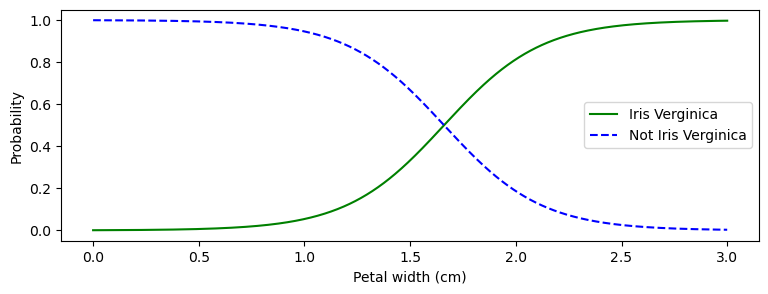

In [ ]:
# @title
X_new = np.linspace(0,3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.figure(figsize=(9,3))
plt.plot(X_new, y_proba[:,1], 'g-', label="Iris Verginica")
plt.plot(X_new, y_proba[:,0], 'b--', label="Not Iris Verginica")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend()
plt.show()

In [ ]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

- Softmax Regression or *Multinomial Logistic Regression*
 - Support multiple classes without having to train and combine multiple binary classifiers
 - For every $x$, compute $s_k(X) = x^T\theta^{(k)}$ for each class $k$ (each class has a $\theta^{(k)} \in \Theta$, the parameter matrix)
 - estimate probability of each class by using *softmax* function
  $$
  \hat{p}_{k} = \sigma(s(x))_{k} = \dfrac{\exp(s_{k}(x))}{\sum_{j=1}^K \exp(s_{j}(x))}
  $$
   - $k$: # of classes
   - $s(x)$ contains scores for each $x$A
   - $\sigma(s(x))_k$ = E[probability] that $x \in k$ given scores


- Class with the highest estimated probabilty is accepted:
    $$
    \hat{y} = \underset{k}{\text{argmax }} \sigma(s(x))_{k}
    $$

 - *argmax* returns the **value** of the variable that maximizes a funciton.


> ! Come back and read Cross Entropy